<h1> <center>Entendendo features </center> </h1>

A maioria de vocês deve ter jogado os jogos de quebra-cabeça. Você obtém muitos pequenos pedaços de uma imagem, onde você precisa montá-los corretamente para formar uma grande imagem real. A questão é: como você faz isso? Que tal projetar a mesma teoria em um programa de computador para que o computador possa jogar quebra-cabeças? 

Bem, as perguntas e a imaginação continuam. Mas tudo depende da questão mais básica? Como você joga quebra-cabeças? Como você organiza muitas peças de imagem embaralhadas em uma única imagem grande? Como você pode juntar muitas imagens naturais em uma única imagem?

A resposta é: estamos procurando padrões específicos ou características específicas que sejam únicas, que possam ser facilmente rastreadas, que possam ser facilmente comparadas. Se buscarmos uma definição de tal característica, podemos achar difícil expressá-la em palavras, mas sabemos o que são. Se alguém lhe pedir para apontar uma boa característica que pode ser comparada em várias imagens, você pode apontar uma. É por isso que até as crianças pequenas podem simplesmente jogar esses jogos. Procuramos essas características em uma imagem, as encontramos, encontramos as mesmas em outras imagens. 

Da mesma forma funciona para a máquina...
é possível criar abordagens fantásticas para encontrar características únicas respeitando as propriedade de features ( invariante a iluminação, escala, rotação). O detector que será apresentado a seguir segue todas essas propriedades.

Nesse exemplo será utilizado o ORB, que é a fusão do detector FAST que por sua vez utiliza a detecção de "quinas" de Harris, pirâmide de escala para a invariancia a escala e e o ORB utiliza o descritor BRIEF.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [85]:

MIN_MATCH_COUNT = 10

img1 = cv2.imread('1.jpg',3)
img1 = cv2.resize(img1, (200,200), interpolation = cv2.INTER_AREA)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('2.jpg',1) 
img2 = cv2.resize(img2, (200,200), interpolation = cv2.INTER_AREA)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.resize(img1, (100,100), interpolation = cv2.INTER_AREA)




In [86]:
# Initiate STAR detector
orb = cv2.ORB_create()

# Encontrando os keypoints (pontos chave) utilizando ORB
kp1 = orb.detect(img1,None)
kp2 = orb.detect(img2,None)
kp3= orb.detect(img3,None)

kp1, des1 = orb.compute(img1,kp1)
kp2, des2 = orb.compute(img2,kp2)
kp3, des3 = orb.compute(img3,kp3)


In [87]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# casamento entre os descritores de cada imagem.
matches = bf.match(des1,des2)
matches1 = bf.match(des1,des3)
# Ordena as features de acordo com a distância.
matches = sorted(matches, key = lambda x:x.distance)
matches1 = sorted(matches1, key = lambda x:x.distance)



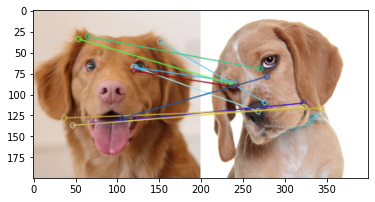

(<matplotlib.image.AxesImage at 0x7fc86c324710>, None)

In [88]:
# primeiros 10 casamentos.
#observe que mesmo com imagens diferentes de cães features algumas features ainda são similares, 
#mas o resultado do casamento de features já não é tão bom.
img4 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img4),plt.show()

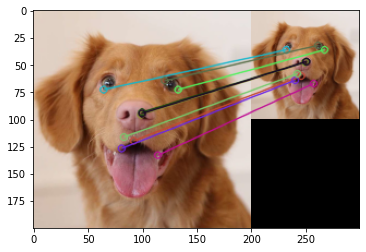

(<matplotlib.image.AxesImage at 0x7fc86c288588>, None)

In [89]:
#observaremos agora a invariância a escala.é a mesma imagem porém com tamanhos diferentes, 
#o detector conseguiu encontrar as mesmas características em ambas imagens.
img5 = cv2.drawMatches(img1,kp1,img3,kp3,matches1[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img5),plt.show()

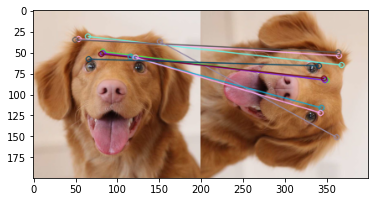

(<matplotlib.image.AxesImage at 0x7fc86c275208>, None)

In [90]:
# aplicaremos agora uma rotação na imagem 3 para analizarmos a invariância a rotação e vamos comparar 
# com a imagem original. Dessa forma é necessário recalcular as features para a imagem rotacionada
img3 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)
kp3= orb.detect(img3,None)
kp3, des3 = orb.compute(img3,kp3)
matches1 = bf.match(des1,des3)
matches1 = sorted(matches1, key = lambda x:x.distance)

img5 = cv2.drawMatches(img1,kp1,img3,kp3,matches1[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img5),plt.show()

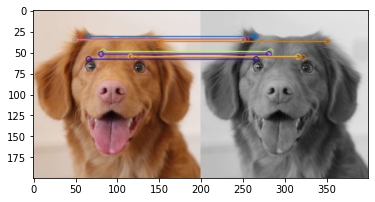

(<matplotlib.image.AxesImage at 0x7fc86c140eb8>, None)

In [92]:
# neste exemplo vamos modificar o padrão de cor da imagem e comparar com a imagem original
img3 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
kp3= orb.detect(img3,None)
kp3, des3 = orb.compute(img3,kp3)
matches1 = bf.match(des1,des3)
matches1 = sorted(matches1, key = lambda x:x.distance)

img5 = cv2.drawMatches(img1,kp1,img3,kp3,matches1[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img5),plt.show()

<h3>Concluindo... </h3>
Features são os padrões capazes de representar uma imagem mesmo que algumas alterações ou processamentos são realizados como nos exemplos apresentados (cor, escala, rotação). Neste caso as features são geralmente caracterizadas por linhas, bordas e cantos, pois são mais representativos na imagem.